## Linear Regression  

* What is a Model?   
* Linear Models     
* Linear regression and correlation 
  - The y-intercept $\beta_0$ 
  - The slope $\beta_1$    
  - The error $\varepsilon_i$    
  - Least squares estimation  
  - Fitted values and residuals   
* The Modeling process      
* Linear regression assumptions   
  - A linear relationship between outcome and predictor variables       
  - The error term $\varepsilon_i$ has the following assumptions:  
    * have mean zero; otherwise the forecasts will be systematically biased.
    * statistical independence of the errors (in particular, no correlation between consecutive errors in the case of time series data).
    * homoscedasticity (constant variance) of the errors.
    * normality of the error distribution.   
* Assessing the model fit 
  - T-statistic   
  - Coefficient of determination ($R^2)$  
  - Adjusted ($R^2)$   
  - Hypothesis testing: Is he "true" $\beta_1 \neq 0$?    
  - P-values    
  - Confidence intervals        
  - Standard error of the regression   
  - F-test     
  - Leverage    
  - Influence       
  - K-fold cross validtion   
* Assessing the regression assumptions  
  - Residual plots    
  - Fitted values versus residuals  
  - Standardized residuals versus theoretical quantiles (Q-Q plot)        
  - Standardized residuals versus leverage    
  - Fit Plots  
* Forecasting with regression  
* No y-intercept?   
* Residual Plots   
* Formula syntax   
* Non-linear transformations of predictors   
* Multiple linear regression 
* Multi-colinearity 


###  Appendix       
* Logistic regression
* Polynomial regression
* Overfitting  
* Regularization   
* Stepwise regression   
* Jarque–Bera test  
* Durbin–Watson statistic  
* Omnibus tests  
* Degrees of freedom   
* Likelihood and Negative Log Likelihood  
* AIC, BIC, Mallows's Cp  
* Dummy variables
* Interaction Terms 

## Linear Regression, Linear Models. Inference and Interpretation

In this lesson we will build and interpreting simple models with linear regression. We then learn to interpret the diagnostics and quality of our models. We expand our modeling tool box with multivariate analysis.  We finish by using logistic regression to predict probabilities and categories.

Rationale: A model is a representation of reality albeit highly simplified. Building a statistical model involves constructing a mathematical description of some real-world phenomena that accounts for the uncertainty and randomness involved in that system.  All statistical hypothesis tests and all statistical estimators are derived from statistical models. Statistical models are a fundamental part of the foundation of statistical inference, data analysis and machine learning.

### Data

We will be using [Francis Galton's](https://en.wikipedia.org/wiki/Francis_Galton) analysis of the heights of sons and fathers. Heights of sons of both tall and short fathers appeared to “revert” or “regress” to the mean of the group.  

Galton created the statistical concept of correlation and widely promoted regression toward the mean. Regression toward the mean become analysis be [Regression analysis Wikipedia](https://en.wikipedia.org/wiki/Regression_analysis))  

In [44]:
from __future__ import print_function
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

## What is a Model?

A statistical model embodies a set of assumptions concerning the generation of the observed data, and similar data from a larger population. A model represents, often in considerably idealized form, the data-generating process. The model assumptions describe a set of probability distributions, some of which are assumed to adequately approximate the distribution from which a particular data set is sampled.
A model is usually specified by mathematical equations that relate one or more random variables and possibly other non-random variables. As such, "a model is a formal representation of a theory" (Herman Adèr quoting Kenneth Bollen).

https://en.wikipedia.org/wiki/Statistical_model


A function is a relationship between two variables. A function can be defined by any mathematical condition relating each argument (input value) to the corresponding output value. 

![image Function (mathematics)](images/330px-Function_machine2.svg.png) 

![image math model](images/Models_A.png) 




## Linear Models

Linear regression predicts the response variable $y$ assuming it has a linear relationship with predictor variable(s) $x$ or $x_1, x_2, ,,, x_n$.

$$y = \beta_0 + \beta_1 x + \varepsilon .$$

*Simple* regression use only one predictor variable $x$. *Mulitple* regression uses a set of predictor variables $x_1, x_2, ,,, x_n$.

The *response variable* $y$ is also called the regressand, forecast, dependent or explained variable. The *predictor variable* $x$ is also called the regressor, independent or explanatory variable.

The parameters $\beta_0$ and $\beta_1$ determine the intercept and the slope of the line respectively. The intercept $\beta_0$ represents the predicted value of $y$ when $x=0$. The slope $\beta_1$ represents the predicted increase in $Y$ resulting from a one unit increase in $x$.

Note that the regression equation is just our famliar equation for a line with an error term.

The equation for a line:  
$$ Y = bX + a $$

$$y = \beta_0 + \beta_1 x $$

The equation for a line with an error term:  

$$ Y = bX + a + \varepsilon $$

$$y = \beta_0 + \beta_1 x + \varepsilon .$$

- $b$ = $\beta_1$ = slope
- $a$ = $\beta_0$ = $Y$ intercept
- $\varepsilon$ = error term


We can think of each observation $y_i$ consisting of the systematic or explained part of the model, $\beta_0+\beta_1x_i$, and the random *error*, $\varepsilon_i$.

_Zero Slope_

Note that when  $\beta_1 = 0$ then response does not change as the predictor changes.

For multiple regression $x$ is a $X$ to produce a system of equations:  

$$ Y = \beta_0 + \beta_1 X  + \varepsilon $$

## The error $\varepsilon_i$

The error term is a catch-all for anything that may affect $y_i$ other than $x_i$. We assume that these errors:

* have mean zero; otherwise the forecasts will be systematically biased.
* statistical independence of the errors (in particular, no correlation between consecutive errors in the case of time series data).
* homoscedasticity (constant variance) of the errors.
* normality of the error distribution.

If any of these assumptions is violated then the robustness of the model to be taken with a grain of salt.


## Least squares estimation

In a linear model, the values of $\beta_0$ and $\beta_1$. These need to be estimated from the data. We call this *fitting a model*.

The least squares method iis the most common way of estimating $\beta_0$ and $\beta_1$ by minimizing the sum of the squared errors. The values of $\beta_0$ and $\beta_1$ are chosen so that that minimize

$$\sum_{i=1}^N \varepsilon_i^2 = \sum_{i=1}^N (y_i - \beta_0 - \beta_1x_i)^2. $$


Using mathematical calculus, it can be shown that the resulting **least squares estimators** are

$$\hat{\beta}_1=\frac{ \sum_{i=1}^{N}(y_i-\bar{y})(x_i-\bar{x})}{\sum_{i=1}^{N}(x_i-\bar{x})^2} $$ 

and

$$\hat{\beta}_0=\bar{y}-\hat{\beta}_1\bar{x}, $$

where $\bar{x}$ is the average of the $x$ observations and $\bar{y}$ is the average of the $y$ observations. The estimated line is known as the *regression line*.

To solve least squares with gradient descent or stochastic gradient descent (SGD) or losed Form (set derivatives equal to zero and solve for parameters).

## Fitted values and residuals

The response values of $y$ obtained from the observed $x$ values are
called *fitted values*: $\hat{y}_i=\hat{\beta}_0+\hat{\beta}_1x_i$, for
$i=1,\dots,N$. Each $\hat{y}_i$ is the point on the regression
line corresponding to $x_i$.

The difference between the observed $y$ values and the corresponding fitted values are the *residuals*:

$$e_i = y_i - \hat{y}_i = y_i -\hat{\beta}_0-\hat{\beta}_1x_i. $$

The residuals have some useful properties including the following two:

$$\sum_{i=1}^{N}{e_i}=0 \quad\text{and}\quad \sum_{i=1}^{N}{x_ie_i}=0. $$

![Linear regression](images/Linear_regression.svg.png)

Residuals are the errors that we cannot predict.Residuals are highly useful for studying whether a given regression model is an appropriate statistical technique for analyzing the relationship.

## Linear regression and correlation

The correlation coefficient $r$ measures the strength and the direction of the linear relationship between the two variables. The stronger the linear relationship, the closer the observed data points will cluster around a straight line.

The _Pearson product-moment correlation coefficient_ is the most widely used of all correlation coefficients. In statistics, the Pearson product-moment correlation coefficient (/ˈpɪərsɨn/) (sometimes referred to as the PPMCC or PCC or Pearson's r) is a measure of the linear correlation (dependence) between two variables X and Y, giving a value between +1 and −1 inclusive, where 1 is total positive correlation, 0 is no correlation, and −1 is total negative correlation. It is widely used in the sciences as a measure of the degree of linear dependence between two variables. It was developed by Karl Pearson from a related idea introduced by Francis Galton in the 1880s. Early work on the distribution of the sample correlation coefficient was carried out by Anil Kumar Gain and R. A. Fisher from the University of Cambridge.

from [Pearson product-moment correlation coefficient](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient)  

Examples of scatter diagrams with different values of correlation coefficient (ρ)

The value of r is such that -1 < r < +1.  

Strong positive correlation r is close to +1. Strong negative correlation r is close to -1. No correlation r is close to 0.   

![Correlation_examples](images/Correlation_examples.png)

The advantage of a regression model over correlation is that it asserts a predictive relationship between the two variables ($x$ predicts $y$) and quantifies this in a useful way for forecasting.


We can have a _positive linear relationship_ (r>0), _negative linear relationship_ (r<0), or _no linear relationship_ (r=0) (Note that no linear relationship doesn't mean no relationship.)

![Anscombe's quartet](images/Anscombes_quartet.svg)


Anscombe's quartet comprises four datasets that have nearly identical simple statistical properties, yet appear very different when graphed. They were constructed in 1973 by the statistician Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect of outliers on statistical properties.

from [Anscombe's quartet - Wikipedia](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)



## The Modeling process  

A. Formula (i.e. what $f(x)$ and which $x_1,x_2, .. x_n$)   
B. Fit (i.e. Estimate the unknown parameters for the model.)   
C. Analysis of fit (i.e. how good is the model)   
D. Analysis of residuals (i.e. how closely did the model match assumptions)   

We often create many models so we *_store & explore_*. That is, make models and save them as variables so we can compare the various iterations of the modeling process.


## A. Formula 

f(x)          | x    
------------- | -------------  
response      | ~ predictor     
response      | ~ explanatory   
dependent     | ~ independent    
outcome       | ~ predictor  
forecast      | ~ predictor   
regressand    | ~ regressor  
explained     | ~ explanatory  



In [45]:
# Load the data into a pandas dataframe
df = pd.read_csv('http://www.math.uah.edu/stat/data/Galton.csv')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [46]:
df.describe()

,Father,Mother,Height,Kids
count,898.000000,898.000000,898.000000,898.000000
mean,69.232851,64.084410,66.760690,6.135857
std,2.470256,2.307025,3.582918,2.685156
min,62.000000,58.000000,56.000000,1.000000
25%,68.000000,63.000000,64.000000,4.000000
50%,69.000000,64.000000,66.500000,6.000000
75%,71.000000,65.500000,69.700000,8.000000
max,78.500000,70.500000,79.000000,15.000000


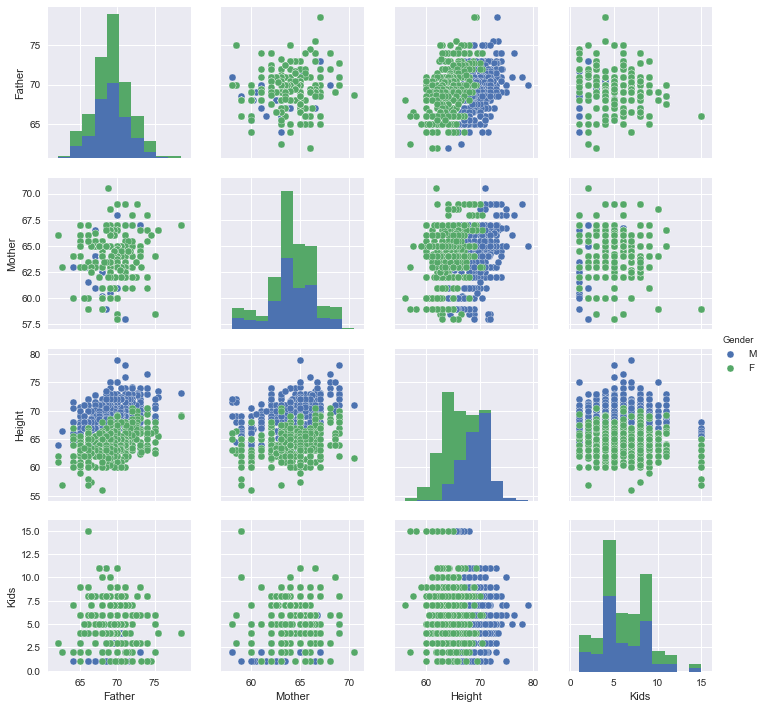

In [47]:
# Quick plot of the data using seaborn
sns.pairplot(df, hue="Gender")
sns.plt.show()

### Galton's Regression to the Mean idea:

Tall fathers will have tall sons, but the height of the sons will be closer to the mean of the current adult male population. The same holds for short fathers and their short sons who, nevertheless, tend to be more average than their father.

In other words, an exceptionally tall person, say 7 feet, would expect to have tall children but not necessarily 7 feet ) as this is exceptional for normally distibuted data). Contrawise,  an exceptionally short person, say 5 feet, would expect to have short children but not necessarily 5 feet ) as this is exceptional for normally distibuted data).


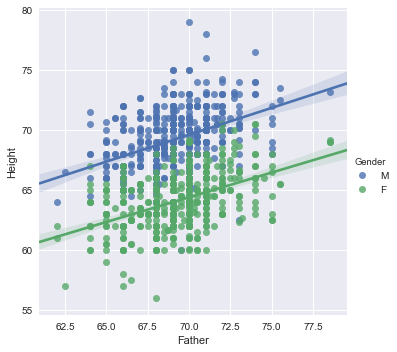

In [48]:
sns.lmplot(y="Height", x="Father", data=df,  hue="Gender")
sns.plt.show()

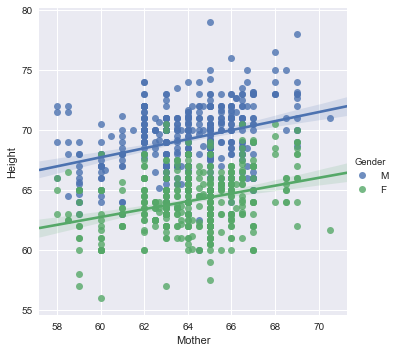

In [49]:
sns.lmplot(y="Height", x="Mother", data=df,  hue="Gender")
sns.plt.show()

It seems that, in general, if the father is taller the child is taller. Also  if the mother is taller the child is taller.

$$ f(x) = \beta_0 + \beta_1 x + \varepsilon . $$

Eyeballing both slopes $\beta_1$ look roughly equal and about 0.4. So we'd expect from this graph a relation (i.e. formula or model) for the son's height.

$$ son = \beta_{0_{son}} + 0.4 x + \varepsilon $$  

and for the daughter's height.

$$ daughter = \beta_{0_{daughter}} + 0.4 x + \varepsilon $$  

Choosing predictors is typically done in 3 ways:  

1. Theory / domain knowledge
2. EDA - exploritory data analysis.
3. Fitting various combinations of outcome and predictors and selecting the best fits (r.g. Stepwise regression)

Here Galton was testing an idea/theory. How dependent is a son's height on his father's height? Domain knowledge would also ask how dependent is a son's height on his mother's height? (I'm not sure is Dalton asked this question or not. We will ask this as well as whether tall mother's and father's tend to have even taller children (i.e. multivariate regression))

In [50]:
# from sklearn import linear_model

X = df[["Father"]]
y = df[["Height"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

[ 39.11038684] [[ 0.39938127]]


This means that our best fit line is:
$$y = a + b x$$

Which translates in to the equations below:

$$ son_{height} = 39.11 + 0.399 x_{father} + \varepsilon $$  


Next let's use `statsmodels`.

In [51]:
# import statsmodels.api as sm
# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.898e+05
Date:                Thu, 27 Apr 2017   Prob (F-statistic):               0.00
Time:                        12:24:51   Log-Likelihood:                -2452.5
No. Observations:                 898   AIC:                             4907.
Df Residuals:                     897   BIC:                             4912.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Father         0.9636      0.002    538.311      0.000         0.960     0.967
==============================================================================
Omnibus:                       17.470   Durbin-Watson:                   1.158
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.840
Skew:                           0.008   Prob(JB):                      0.00730
Kurtosis:                       2.487   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  Father    0.963575
dtype: float64
R2:  0.996914082281


Note that the coefficients are almost identical to what we saw before with scikit-learn, and the fit is very good ($R^2=0.997$). 

If you look closely you'll note that this model doesn't include an intercept by default like scikit-learn does. There's an easy way to do this using add_constant(X)

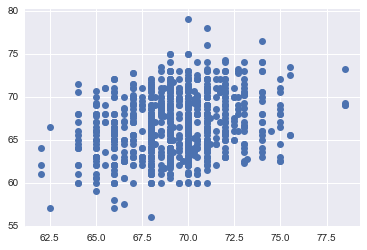

In [53]:
X = df[["Father"]]
y = df[["Height"]]
plt.plot(X, y, "o")

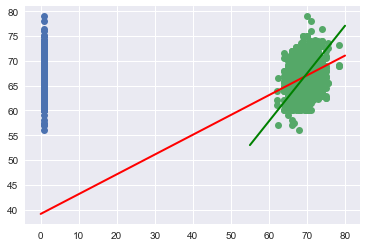

In [54]:
X = sm.add_constant(X) #  Our model needs an intercept so we add a column of 1s:
plt.plot(X, y, "o")
x2 = np.linspace(0, 80, 55)
y2 = 39.11 + (0.3994*x2)
plt.plot(x2, y2, lw=2, color="r")
x2 = np.linspace(55, 80, 33)
y2 = (0.963575*x2)
plt.plot(x2, y2, lw=2, color="g")
plt.show()

In [55]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     73.51
Date:                Thu, 27 Apr 2017   Prob (F-statistic):           4.35e-17
Time:                        12:24:51   Log-Likelihood:                -2384.3
No. Observations:                 898   AIC:                             4773.
Df Residuals:                     896   BIC:                             4782.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         39.1104      3.227     12.120      0.000        32.777    45.444
Father         0.3994      0.047      8.574      0.000         0.308     0.491
==============================================================================
Omnibus:                       25.507   Durbin-Watson:                   1.342
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.383
Skew:                           0.080   Prob(JB):                      0.00124
Kurtosis:                       2.424   Cond. No.                     1.94e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const     39.110387
Father     0.399381
dtype: float64
R2:  0.0758202803404


Note that the coefficients are almost identical to what we saw before with scikit-learn, and the fit is pretty good ($R^2=0.927$).

Note that the coefficients are almost identical to what we saw before with scikit-learn, and the fit is pretty good ($R^2=0.927$).

## Assessing the model fit  

To evaluate a regression model we ask the following questions:

A. Does it make sense?  
B. Is the "true" $\beta_1$ significantly differnet from  $\beta_1 = 0$?  
C. Are any assumptions of the model violated?  
D. How tightly the parameter estimation fits the residuals?  


## Hypothesis testing: Is he "true" $\beta_1 \neq 0$?

Recall that when the slope $\beta_1 = 0$ we have no relationship between the outcome and predictors.

Hypothesis tests assume the thing you want to disprove, and then to look for evidence that the assumption is wrong. In this case, we assume that there is no relationship between $x$ and $f(x)$. This is called the *null hypothesis* and is stated as

$$H_0: \beta_1 = 0$$

Evidence against this hypothesis is provided by the value of $\hat{\beta}_1$, the slope estimated from the data. If $\hat{\beta}_1$ is very different from zero, we conclude that the null hypothesis is incorrect and that the evidence suggests there really is a relationship between $x$ and $f(x)$.

There are many hypothesis tests that can be used to test whether the "true" $\beta_1 \neq 0$:

* Student’s T-Tests
* One-Sample T-Test
* Two-Sample T-Test
* Paired T-Test
* Wilcoxon Rank-Sum Test
* Analysis of Variance (ANOVA)
* Kruskal-Wallis Test

We will discuss these more in the module on hypothesis testing. As R's lm() function gives p-values by default we will focus on them.

## P-value

To determine how big the difference between $\hat{\beta}_1$ (the "true"  $\beta_1$) and $\beta_1$ must be before we would reject the null hypothesis, we calculate the probability of obtaining a value of $\beta_1$ as large as we have calculated if the null hypothesis were true. This probability is known as the *P-value*.

In statistics, the p-value is a function of the observed sample results (a statistic) that is used for testing a statistical hypothesis. Before the test is performed, a threshold value is chosen, called the significance level of the test, traditionally 5% or 1% and denoted as $\alpha$.  

If the p-value is equal to or smaller than the significance level ($\alpha$), it suggests that the observed data are inconsistent with the assumption that the null hypothesis is true and thus that hypothesis must be rejected (but this does not automatically mean the alternative hypothesis can be accepted as true). When the p-value is calculated correctly, such a test is guaranteed to control the Type I error rate to be no greater than $\alpha$.

from [P-value](https://en.wikipedia.org/wiki/P-value)

## Confidence intervals

In statistics, a confidence interval (CI) is a type of interval estimate of a population parameter. It provides an interval estimate for lower or upper confidence bounds. For $\beta_1$, usually referred to as a *confidence interval* and is typically +/-0.5% (a 99% confidence interval),+/-1% (a 98% confidence interval),+/-2.5% (a 95% confidence interval) or +/-5% (a 90% confidence interval). The lower and upper confidence bounds need not be equal, and they can be any number such that the confidence interval not exceed 100%.


## Residual plots

The error term $\varepsilon_i$ has the following assumptions:

* have mean zero; otherwise the forecasts will be systematically biased.
* statistical independence of the errors (in particular, no correlation between consecutive errors in the case of time series data).
* homoscedasticity (constant variance) of the errors.
* normality of the error distribution.  

Plotting the residuals can asses whether (or how much) these assumptions were violated. We will use R to generate residual plots in lesson 2.

![Homoscedasticity](images/Homoscedasticity.png)

![Heteroscedasticity](images/Heteroscedasticity.png)

## Outliers

Observations that take on extreme values compared to the majority can strongky effect the least squares estimators:

$$\hat{\beta}_1=\frac{ \sum_{i=1}^{N}(y_i-\bar{y})(x_i-\bar{x})}{\sum_{i=1}^{N}(x_i-\bar{x})^2} $$ 

and

$$\hat{\beta}_0=\bar{y}-\hat{\beta}_1\bar{x}, $$ 

Plotting and occasionally removing outliers and refitting is part of the modeling process.  

## Standard Error of the Regression

How well the model has fitted the data can be thought of as how "tightly" the date fit the regression line. That is, the spread, variance or standard deviation of the residuals.This spread between fitted and actual values is usually known as the *standard error of the regression*:

$$s_e=\sqrt{\frac{1}{N-2}\sum_{i=1}^{N}{e_i^2}}.$$

Here, we divide by $N-2$ because we have estimated two parameters (the intercept and slope) in computing the residuals. Normally, we only need to estimate the mean (i.e., one parameter) when computing a standard deviation. The divisor is always $N$ minus the number of parameters estimated in the calculation.

Note that we can (and should) visualize the predicted vs actual values as this gives more information about the homoscedasticity (constant variance) of the errors.

## The t-statistic and the standard error

The standard error (SE) is the standard deviation of the sampling distribution of a statistic. A sampling distribution is the probability distribution of a given statistic based on a random sample. The dispersion of sample means around the population mean is the standard error. The dispersion of individual observations around the population mean is the standard deviation. The standard error equals the standard deviation divided by the square root of the sample size. As the sample size increases, the dispersion of the sample means clusters more closely around the population mean and the standard error decreases. The standard error is an estimate of the standard deviation of the coefficient. It can be thought of as the spread between fitted and actual values.

$f(x) = \beta_0 + \beta_1 x + \varepsilon . $

Is $H_0: \beta_1 = 0$?

![Standard deviation diagram](images/Standard_deviation_diagram.svg.png)

The t-statistic is the coefficient divided by its standard error. For example, a $\beta_1$ of 38.2 divided by a standard error of 3.4 would give a t value of 11.2. 

For a t-statistic high is good. A $\beta_1$ of 38.2 ivided by a standard error of 38.2 would give a t value of 1. A $\beta_1$ of 38.2 ivided by a standard error of 14.1 would give a t value of 2.


$$s_e=\sqrt{\frac{1}{N-2}\sum_{i=1}^{N}{e_i^2}}.$$


If a coefficient is large compared to its standard error, then we can reject the hypothesis that $\beta_1$ = 0. Intuitively we can think of this if the slope is not small and there is a not much spread between fitted and actual values then we can be confident that the true slope $\hat{\beta}_1$ is not 0.

A t-statistic (t value) of greater than 2 in magnitude, corresponds to p-values less than 0.05.

The p-value is a function of the observed sample results (a statistic) that is used for testing a statistical hypothesis. Before the test is performed, a threshold value is chosen, called the significance level of the test, traditionally 5% or 1% and denoted as $\alpha$.  

If the p-value is equal to or smaller than the significance level ($\alpha$), it suggests that the observed data are inconsistent with the assumption that the null hypothesis is true and thus that hypothesis must be rejected (but this does not automatically mean the alternative hypothesis can be accepted as true). When the p-value is calculated correctly, such a test is guaranteed to control the Type I error rate to be no greater than $\alpha$.

from [P-value](https://en.wikipedia.org/wiki/P-value)

## R-squared $R^2$ 

[R-squared](https://en.wikipedia.org/wiki/Coefficient_of_determination)   (coefficient of determination) is a statistical measure of how close the data are to the fitted regression line. the coefficient of determination, denoted $R^2$ or $r^2$ and pronounced "R squared", is a number that indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

R-squared = Explained variation / Total variation

R-squared is always between 0 and 100%:

* 0% (or 0) indicates that the model explains none of the variability of the response data around its mean.  
* 100% (or 1) indicates that the model explains all the variability of the response data around its mean. 

The higher the R-squared, the better the model fits your data. 

The better the linear regression fits the data in comparison to the simple average (on the left graph), the closer the value of $R^2$ is to 1. The areas of the blue squares represent the squared residuals with respect to the linear regression. The areas of the red squares represent the squared residuals with respect to the average value.]]

A data set has $n$ values marked $y_1$,...,$y_n$ (collectively known as $y_i$ or as a vector $y = [y_1,..., y_n]^T$), each associated with a predicted (or modeled) value $\hat{y}_{1},...,\hat{y}_{n}$.

Define the residuals as as $e_i = y_i − \hat{y}_{i}$ (forming a vector $e$).

If $\bar{y}$ is the mean of the observed data:

$$\bar{y}=\frac{1}{n}\sum_{i=1}^n y_i $$

then the variability of the data set can be measured using three sums of square formulas:

* The total sum of squares (proportional to the variance of the data):

 $$SS_\text{tot}=\sum_i (y_i-\bar{y})^2,$$

* The regression sum of squares, also called the explained sum of squares:

$$SS_\text{reg}=\sum_i (\hat{y}_{i} -\bar{y})^2,$$

* The sum of squares of residuals, also called the residual sum of squares:

$$SS_\text{res}=\sum_i (y_i - \hat{y}_{i})^2=\sum_i e_i^2\,$$

![Correlation_examples](images/r-squared_A.png)

The most general definition of the coefficient of determination is

$$R^2 \equiv 1 - {SS_{\rm residuals}\over SS_{\rm total}}.\,$$

$R^2$ can be thought of as *the proportion of variation in the forecast variable that is accounted for (or explained) by the regression model**

In the definition of $R^2$, $0 \geq R^2 \geq 1$ as is similar to he value of $r^2$ (the square of the pearson correlation between $f(x)$ and $x$.


![Correlation_examples](images/r-squared.png)

Image credit: [http://www.rapidinsightinc.com/brushing-r-squared/](http://www.rapidinsightinc.com/brushing-r-squared/)


In [57]:
def random_distributions(n=555):
  mu, sigma, scale = 5.5, 2*np.sqrt(2), 0.5
  a = np.random.normal(mu, sigma, n)
  b = np.random.normal(mu, sigma, n)
  c = np.linspace(np.amin(a),np.amax(a),n)
  d = mu + (sigma*c) + np.random.normal(mu*scale, sigma*scale, n)
  df = pd.DataFrame({'A' :a, 'B' :b,'C' :c,'D' :d})
  return df

In [58]:
n=555
df=random_distributions(n)
df.head()

,A,B,C,D
0,10.627101,6.098237,-3.190772,-2.753437
1,1.888265,6.495606,-3.159488,-0.427798
2,8.673075,8.849652,-3.128204,-1.689514
3,7.185813,5.419922,-3.096920,-0.070604
4,4.281947,14.342182,-3.065636,-0.292708


In [59]:
df.describe()

,A,B,C,D
count,555.000000,555.000000,555.000000,555.000000
mean,5.476598,5.463612,5.474899,23.647838
std,2.776902,2.819924,5.016672,14.288140
min,-3.190772,-1.153415,-3.190772,-2.753437
25%,3.586144,3.242092,1.142064,11.079762
50%,5.508179,5.393823,5.474899,23.593616
75%,7.498298,7.421022,9.807735,35.650016
max,14.140570,14.342182,14.140570,49.505494


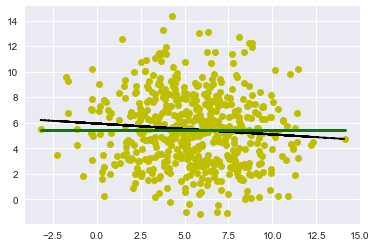

In [60]:
X = df["A"]
y = df["B"]
fit= np.polyfit(X, y, 1)
fit_fn = np.poly1d(fit)
plt.plot(X,y, 'yo', X, fit_fn(X), '--k')
x2 = np.linspace(np.amin(X),np.amax(X),n)
y2 = np.ones(n)*np.mean(y)
plt.plot(x2, y2, lw=3, color="g")
plt.show()

SSR is the "regression sum of squares" and quantifies how far the estimated sloped regression line, $\hat{y}_{i}$, is from the horizontal "no relationship line," the sample mean or $\bar{y}$ (the straight green line).

$$SS_\text{regression}=\sum_i (\hat{y}_{i} -\bar{y})^2,$$

Note:  $\hat{y}_{i}$ is the predicted value on the regression line.

In a poor fit $SS_\text{regression}$ is small in relation to the variance around $\bar{y}$ (i.e. the total variance).

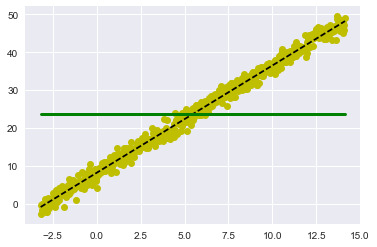

In [61]:
X = df["C"]
y = df["D"]
fit= np.polyfit(X, y, 1)
fit_fn = np.poly1d(fit)
plt.plot(X,y, 'yo', X, fit_fn(X), '--k')
x2 = np.linspace(np.amin(X),np.amax(X),n)
y2 = np.ones(n)*np.mean(y)
plt.plot(x2, y2, lw=3, color="g")
plt.show()

SSE is the "error sum of squares" or "least square error" and quantifies how much the data points, $y_i$, vary around the estimated regression line, $\hat{y}_{i}$.

The sum of squares of residuals, also called the residual sum of squares, error sum of squares and least square error:

$$SS_\text{residuals}=\sum_i (y_i - \hat{y}_{i})^2=\sum_i e_i^2\,$$

NOTE: That if the $SS_\text{residuals}$ is small, it is good. One wants the residual error to be small.

SSTO ($SS_\text{total}$) is the "total sum of squares" and quantifies how much the data points, $y_i$, vary around their mean, $\bar{y}$.

$$SS_\text{total}=\sum_i (y_i - \bar{y}_{i})^2=\sum_i e_i^2\,$$

Note that $SS_\text{total} = SS_\text{regression} + SS_\text{residuals}$.

The most general definition of the coefficient of determination is

$$R^2 \equiv {SS_{\rm regression}\over SS_{\rm total}}  \equiv 1 - {SS_{\rm residuals}\over SS_{\rm total}} $$

Therefore when $SS_{\rm residuals}$ is small in relation to $SS_{\rm total}$ then $R^2$ will be high (near 1).




## F-test 

In regression it is known that 

$$ Var(residuals) \over Var(errors) $$

$f(x) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 ... + \beta_n x_n + \varepsilon . $

Is $H_0: \beta_1 = \beta_2 = \beta_3  ... = \beta_n = 0$?

$$
H_{0}: β_{1}= β_{2}=….= β_{n} = 0
$$
$$
H_{1}: \quad at \quad least \quad one \quad pair \quad  β_{j}≠ β_{j'}
$$
The o

follows a [Chi-squared](https://en.wikipedia.org/wiki/Chi-squared_distribution) $\chi^2$ distribution.

The p-values and t-stats assess the fit of individual parameters. It would be nice to have a measure of fit that assesses the overall regression. The F-stat is a measure for the regression as a whol

An [F-test](https://en.wikipedia.org/wiki/F-test) is any statistical test in which the test statistic has an F-distribution under the null hypothesis. Like a t-statistic, or a p-value it provides an estimate of whether one should accept or reject the null hypothesis. The F-test is sensitive to non-normality (as is a t-statistic) but is appropriate under the assumptions of normality and [homoscedasticity](https://en.wikipedia.org/wiki/Homoscedasticity).

In a sum of squares due to lack of fit is one of the components of a partition of the sum of squares in an analysis of variance, used in the numerator in an F-test of the null hypothesis that says that a proposed whole model fits well.

In order for the lack-of-fit sum of squares to differ from the Residual sum of squares, there must be more than one value of the response variable for at least one of the values of the set of predictor variables.  For example, consider fitting a line

$$ y = \alpha x + \beta \, $$

by the method of least squares.  One takes as estimates of ''α'' and ''β'' the values that minimize the sum of squares of residuals, i.e., the sum of squares of the differences between the observed ''y''-value and the fitted ''y''-value.  To have a lack-of-fit sum of squares that differs from the residual sum of squares, one must observe more than one ''y''-value for each of one or more of the ''x''-values.  One then partitions the "sum of squares due to error", i.e., the sum of squares of residuals, into two components:

$$
\begin{align}
F & = \frac{ \text{lack-of-fit sum of squares} /\text{degrees of freedom} }{\text{pure-error sum of squares} / \text{degrees of freedom} } \\[8pt]
& = \frac{\left.\sum_{i=1}^n n_i \left( \overline Y_{i\bullet} - \widehat Y_i \right)^2\right/ (n-p)}{\left.\sum_{i=1}^n \sum_{j=1}^{n_i} \left(Y_{ij} - \overline Y_{i\bullet}\right)^2 \right/ (N - n)}
\end{align}
$$

has an *F-distribution* with the corresponding number of degrees of freedom in the numerator and the denominator, provided that the model is correct. If the model is wrong, then the probability distribution of the denominator is still as stated above, and the numerator and denominator are still independent.  But the numerator then has a *noncentral chi-squared distribution*, and consequently the quotient as a whole has a *non-central F-distribution*. The F-distribution, also known as Snedecor's F distribution or the Fisher–Snedecor distribution (after Ronald Fisher and George W. Snedecor) is a continuous probability distribution that arises frequently as the null distribution of a test statistic, most notably in the analysis of variance.

The assumptions of normal distribution of errors and independence can be shown to entail that this lack-of-fit test is the *likelihood-ratio test* of this null hypothesis.
  
A high F-stat is good.

## Leverage 

A data point has high leverage if it has "extreme" predictor x values. With a single predictor, an extreme x value is simply one that is particularly high or low.  


## Influence

A data point is influential if it unduly influences any part of a regression analysis. Influence is high leverage and high residuals and is often meaured by statistics like the Cook's distance.

![Leverage vs Influenc](images/leverage_vs_influence.png)

Image credit:  [Leverage and Influential Points in Simple Linear Regression https://youtu.be/xc_X9GFVuVU](Leverage and Influential Points in Simple Linear Regression https://youtu.be/xc_X9GFVuVU)

## K-fold cross validation 

In general  to assess the fit of the model one can use summary measures of goodness of fit (such as $R^2$) or by assessing the predictive ability of the model (using  k-fold cross-validation). We'd also like to deterime if there’s any observations that do not fit the model or that have an undue influence on the model.

K-fold cross validation is a simple, intuitive way to estimate prediction error.  K-fold cross-validation, which partitions the data into $k$ equally sized segments (called ‘folds’). One fold is held out for validation while the other $k-1$ folds are used to train the model and then used to predict the target variable in our testing data. This process is repeated $k$ times, with the performance of each model in predicting the hold-out set being tracked using a performance metric such as accuracy. In the case of regression that would be the residuals of the test set based on the linear model generated for the training set.

## Forecasting with regression

Forecasts from a simple linear model are obtained using the equation $$\hat{f(x)}=\hat{\beta}_0+\hat{\beta}_1 x $$ where $x$ is the value of the predictor for which we require a forecast.

Given a new unobserved x we can easily predict $f(x)$ given our estimates $\beta_0 and \beta_1$


## No y-intercept?

![No y-intercept?](images/y_or_no_y.png)

## Residual Plots

The error term $\varepsilon_i$ has the following assumptions:

* have mean zero; otherwise the forecasts will be systematically biased.
* statistical independence of the errors (in particular, no correlation between consecutive errors in the case of time series data).
* homoscedasticity (constant variance) of the errors.
* normality of the error distribution.  

The typical plots are:

* _Residuals vs Fitted_  

the residuals and the fitted values should be uncorrelated in a [homoscedastic](https://en.wikipedia.org/wiki/Homoscedasticity) linear model with normally distributed errors. There should not be a dependency between the residuals and the fitted values,  

![Residuals vs Fitted](images/Residuals_vs_Fitted.png)


* _Residuls vs Normal_  

This is a [Q–Q plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot) to check if the residuls are normal (i.e. normality of the error distribution.)    

![Residuals vs Fitted](images/Residuals_vs_Normal.png)

* _Standardized Residuals vs Fitted Values_  

[standardized residuals](https://en.wikipedia.org/wiki/Studentized_residual) means every residual plot you look at with any model is on the same standardized y-axis. A standardized (or studentized) residual is the quotient resulting from the division of a residual by an estimate of its standard deviation. This makes it easier to compare many residul plots. This process is also called *studentizing* (after [William Sealey Gosset](https://en.wikipedia.org/wiki/William_Sealy_Gosset), who wrote under the pseudonym Student).

The key reason for studentizing is that, in regression analysis of a multivariate distribution, the variances of the residuals at different input variable values may differ, even if the variances of the errors at these different input variable values are equal. 

![Standardized Residuals vs Fitted Values](images/Standardized_Residuals_vs_Fitted_Values.png)

* _Residuals vs Leverage_  

We use leverage to check for outliers. To understand [leverage](https://en.wikipedia.org/wiki/Leverage_%28statistics%29), recognize that simple linear regression fits a line that will pass through the center of your data. High-leverage points are those observations, if any, made at extreme or outlying values of the independent variables such that the lack of neighboring observations means that the fitted regression model will pass close to that particular observation. 

To think of the leverage of a point consider how the slope might change if the model were fit without the data point in question. A common way to estimate of the influence of a data point is [Cook's distance or Cook's D](https://en.wikipedia.org/wiki/Cook%27s_distance)

$$ D_i = \frac{\sum_{j = 1}^n (\hat{y}_{j(i)} - \hat{y}_j)^2}{2S^2} $$

where $\hat{y}_{j(i)}$ is the $j^{th}$ fitted value based on the fit with the $i^{th}$ point removed. ${S^2} $is the [Mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error) 

An alternate form of Cook's distance:

$$ D_i = \frac{r_i^2}{2} \frac{h_{ii}}{1 - h_{ii}} $$

To be influential a point must:

Have high leverage $h_{ii}$ and
Have a high standardized residual $r_i$

Analyists often look for and remove high leverage points and re-fit a model.

![Residuals vs Leverage](images/Residuals_vs_Leverage.png)

## Formula syntax

In [62]:
# Load the data into a pandas dataframe
galton = pd.read_csv('http://www.math.uah.edu/stat/data/Galton.csv')
galton.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [63]:
# requires from statsmodels.formula.api import ols
father_model = ols("Height ~ Father", data=galton).fit()
father_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     73.51
Date:                Thu, 27 Apr 2017   Prob (F-statistic):           4.35e-17
Time:                        12:24:52   Log-Likelihood:                -2384.3
No. Observations:                 898   AIC:                             4773.
Df Residuals:                     896   BIC:                             4782.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     39.1104      3.227     12.120      0.000        32.777    45.444
Father         0.3994      0.047      8.574      0.000         0.308     0.491
==============================================================================
Omnibus:                       25.507   Durbin-Watson:                   1.342
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.383
Skew:                           0.080   Prob(JB):                      0.00124
Kurtosis:                       2.424   Cond. No.                     1.94e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
# -1 removes the y intercept
father_model = ols("Height ~ Father -1", data=galton).fit()
father_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.898e+05
Date:                Thu, 27 Apr 2017   Prob (F-statistic):               0.00
Time:                        12:24:52   Log-Likelihood:                -2452.5
No. Observations:                 898   AIC:                             4907.
Df Residuals:                     897   BIC:                             4912.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Father         0.9636      0.002    538.311      0.000         0.960     0.967
==============================================================================
Omnibus:                       17.470   Durbin-Watson:                   1.158
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.840
Skew:                           0.008   Prob(JB):                      0.00730
Kurtosis:                       2.487   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# -1 removes the y intercept
father_model = ols("Height ~ Father + Mother -1", data=galton).fit()
father_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.697e+05
Date:                Thu, 27 Apr 2017   Prob (F-statistic):               0.00
Time:                        12:24:52   Log-Likelihood:                -2381.2
No. Observations:                 898   AIC:                             4766.
Df Residuals:                     896   BIC:                             4776.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Father         0.5425      0.034     15.972      0.000         0.476     0.609
Mother         0.4555      0.037     12.414      0.000         0.383     0.527
==============================================================================
Omnibus:                       52.885   Durbin-Watson:                   1.354
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.434
Skew:                           0.054   Prob(JB):                     3.65e-05
Kurtosis:                       2.269   Cond. No.                         41.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Non-linear transformations of predictors

Even if the data is non-linear one might be able to use a tranform so it has a linear form and simple linear regression can be applied.



In [66]:
father_model_log = ols("Height ~ np.log(Father) -1", data=galton).fit()
father_model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.325e+05
Date:                Thu, 27 Apr 2017   Prob (F-statistic):               0.00
Time:                        12:24:52   Log-Likelihood:                -2390.9
No. Observations:                 898   AIC:                             4784.
Df Residuals:                     897   BIC:                             4789.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
np.log(Father)    15.7580      0.027    576.605      0.000        15.704    15.812
==============================================================================
Omnibus:                       21.551   Durbin-Watson:                   1.321
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.030
Skew:                           0.083   Prob(JB):                      0.00244
Kurtosis:                       2.458   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multiple regression



Multiple linear regression is the extension of a single predictor variable $x$ to a set predictor variables, {$x_1, x_2, x_2, ... x_n$}, that is

$$ Y = \beta_{1} x_{1} + \beta_{2} x_{2}  + \beta_{3} x_{3}  + \beta_{n} x_{n}  + \varepsilon $$  

these n equations are stacked together and written in vector form as

$$ Y = \beta X  + \varepsilon $$  

Where $Y$, $beta$, and $\varepsilon$ are vectors and $X$ is a matrix  (sometimes called the design matrix).


![Multiple linear regression](images/multiple_regression.jpg)

Image credit:  [http://www.sjsu.edu/faculty/gerstman/EpiInfo/cont-mult.htm](http://www.sjsu.edu/faculty/gerstman/EpiInfo/cont-mult.htm)

## Does both the Mothers and fathers heights matter?

Multiple regression is an extension of simple linear regression. It is used when we want to predict the value of a variable based on the value of two or more other variables. The variable we want to predict is called the dependent variable (or sometimes, the outcome, target or criterion variable).


In [67]:
mother_father_model = ols("Height ~ Mother + Father -1", data=galton).fit()
mother_father_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.697e+05
Date:                Thu, 27 Apr 2017   Prob (F-statistic):               0.00
Time:                        12:24:52   Log-Likelihood:                -2381.2
No. Observations:                 898   AIC:                             4766.
Df Residuals:                     896   BIC:                             4776.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Mother         0.4555      0.037     12.414      0.000         0.383     0.527
Father         0.5425      0.034     15.972      0.000         0.476     0.609
==============================================================================
Omnibus:                       52.885   Durbin-Watson:                   1.354
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.434
Skew:                           0.054   Prob(JB):                     3.65e-05
Kurtosis:                       2.269   Cond. No.                         41.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
mother_father_model_A = ols("Height ~ Mother + Father + Mother : Father -1", data=galton).fit()
mother_father_model_A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.163e+05
Date:                Thu, 27 Apr 2017   Prob (F-statistic):               0.00
Time:                        12:24:52   Log-Likelihood:                -2368.3
No. Observations:                 898   AIC:                             4743.
Df Residuals:                     895   BIC:                             4757.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Mother            0.6277      0.049     12.685      0.000         0.531     0.725
Father            0.6989      0.045     15.390      0.000         0.610     0.788
Mother:Father    -0.0049      0.001     -5.102      0.000        -0.007    -0.003
==============================================================================
Omnibus:                       45.868   Durbin-Watson:                   1.387
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.955
Skew:                           0.064   Prob(JB):                     7.66e-05
Kurtosis:                       2.300   Cond. No.                     1.97e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
mother_father_model_A = ols("Height ~ Mother + Father -1", data=galton).fit()
mother_father_model_A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.697e+05
Date:                Thu, 27 Apr 2017   Prob (F-statistic):               0.00
Time:                        12:24:52   Log-Likelihood:                -2381.2
No. Observations:                 898   AIC:                             4766.
Df Residuals:                     896   BIC:                             4776.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Mother         0.4555      0.037     12.414      0.000         0.383     0.527
Father         0.5425      0.034     15.972      0.000         0.476     0.609
==============================================================================
Omnibus:                       52.885   Durbin-Watson:                   1.354
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.434
Skew:                           0.054   Prob(JB):                     3.65e-05
Kurtosis:                       2.269   Cond. No.                         41.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multi-colinearity

In statistics, multicollinearity (also collinearity) is a phenomenon in which two or more predictor variables in a multiple regression model are highly correlated, meaning that one can be linearly predicted from the others with a non-trivial degree of accuracy. In this situation the coefficient estimates of the multiple regression may change erratically in response to small changes in the model or the data. Multicollinearity does not reduce the predictive power or reliability of the model as a whole, at least within the sample data set; it only affects calculations regarding individual predictors. That is, a multiple regression model with correlated predictors can indicate how well the entire bundle of predictors predicts the outcome variable, but it may not give valid results about any individual predictor, or about which predictors are redundant with respect to others.

- from [multicollinearity - Wikipedia](https://en.wikipedia.org/wiki/Multicollinearity)


In [70]:
galton.corr()

,Father,Mother,Height,Kids
Father,1.000000,0.073665,0.275355,-0.160023
Mother,0.073665,1.000000,0.201655,-0.020030
Height,0.275355,0.201655,1.000000,-0.126910
Kids,-0.160023,-0.020030,-0.126910,1.000000


## Appendix  


## Logistic regression

[Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression), or logit regression, or is a regression model where the outcome variable is categorical. Often this is used when the variable is binary (e.g. yes/no, survived/dead, pass/fail, etc.)

Logistic regression measures the relationship between the categorical response variable and one or more predictor variables by estimating probabilities. 

**Linear regression:** continuous response is modeled as a linear combination of the features:

$$y = \beta_0 + \beta_1x$$

**Logistic regression:** log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:

$$\ln \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

This is called the **logit function**.

Probability is sometimes written as $\pi$:

$$\ln \left({\pi\over 1-\pi}\right) = \beta_0 + \beta_1x$$

The equation can be rearranged into the **logistic function**:

$$\pi = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

- Logistic regression outputs the **probabilities of a specific class**
- Those probabilities can be converted into **class predictions**

The **logistic function** has some nice properties:

- Takes on an "s" shape
- Output is bounded by 0 and 1 (Probabilty is also bounded by 0 and 1)

### Probability of passing an exam versus hours of study  

Suppose we wish to answer the following question:

_A group of 20 students spend between 0 and 6 hours studying for an exam. How does the number of hours spent studying affect the probability that the student will pass the exam?_

Note that the dependent variable pass/fail represented by "1" and "0" are categorical. A standard linear regression line of the form $y = \beta_0 + \beta_1 x + \varepsilon$ doesn't fit the data well.

In [71]:
url = 'http://nikbearbrown.com/YouTube/MachineLearning/DATA/Hours_vs_Pass_Exam.csv'
hours_pass = pd.read_csv(url)
hours_pass.head()

,Hours,Pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0


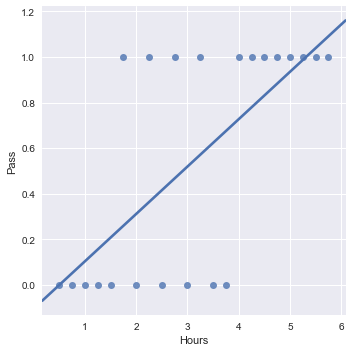

In [72]:
sns.lmplot(x='Hours', y='Pass', data=hours_pass, ci=None)

## Logistic function (S-curve)

A *[logistic function](https://en.wikipedia.org/wiki/Logistic_function)* or *logistic curve* is a common "S" shape curve, with equation:

$$f(x) = \frac{1}{1 + \mathrm e^{-x}} $$ 

$$f(x) = \frac{L}{1 + \mathrm e^{-k(x-x_0)}} $$

where  

* $e$ = the natural logarithm base $e$ (also known as $e$ or Euler's number),   
* $x_0$ = the $x$-value of the sigmoid's midpoint,    
* $L$ = the curve's maximum value, and     
* $k$ = the steepness of the curve.    

For values of $x$ in the range of real number's from $-\infty$ to $\infty$, the S-curve shown on the right is obtained (with the graph of $f$ approaching $L$ as $x$ approaches $\infty$ and approaching zero as $x$ approaches $-\infty$).

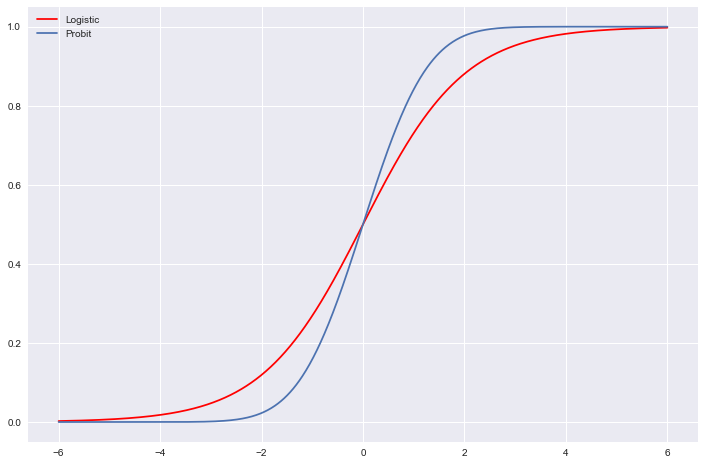

In [73]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
support = np.linspace(-6, 6, 1000)
ax.plot(support, stats.logistic.cdf(support), 'r-', label='Logistic')
ax.plot(support, stats.norm.cdf(support), label='Probit')
ax.legend();

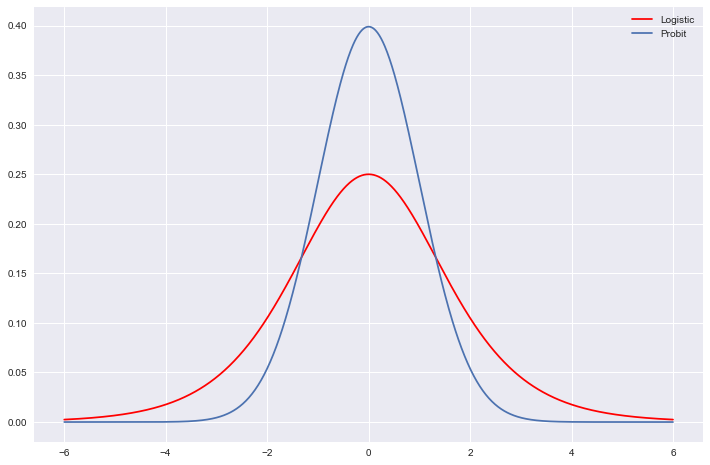

In [74]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
support = np.linspace(-6, 6, 1000)
ax.plot(support, stats.logistic.pdf(support), 'r-', label='Logistic')
ax.plot(support, stats.norm.pdf(support), label='Probit')
ax.legend();

In [75]:
hours_pass_model = sm.Logit(hours_pass['Pass'], hours_pass['Hours']).fit()
hours_pass_model.summary()

Optimization terminated successfully.
         Current function value: 0.617994
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Pass   No. Observations:                   22
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            0
Date:                Thu, 27 Apr 2017   Pseudo R-squ.:                  0.1031
Time:                        12:24:53   Log-Likelihood:                -13.596
converged:                       True   LL-Null:                       -15.158
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Hours          0.2366      0.139      1.701      0.089        -0.036     0.509
==============================================================================
"""

## Probability and odds

$$probability = \frac {one\ event} {all\ events}$$

$$odds = \frac {one\ event} {all\ other\ events}$$

Examples:

- Dice roll of 1: probability = 1/6, odds = 1/5
- Even dice roll: probability = 3/6, odds = 3/3 = 1
- Dice roll less than 6: probability = 5/6, odds = 5/1 = 5

$$odds = \frac {probability} {1 - probability}$$

$$probability = \frac {odds} {1 + odds}$$

**Interpretation:** A 1 unit increase in 'Hours' is associated with a 	0.2366 unit increase in the log-odds of 'Pass'.

These coefficients are entered in the logistic regression equation to estimate the probability of passing the exam:

$$
\text{Probability of passing exam} = \frac{1}{1 + \text{exp} \left( - \left( 0.2366 \cdot \text{Hours} - 0 \right) \right) }
$$


## Polynomial regression

The following examples are adpated from the scikit-learn documentation by Mathieu Blondel & Jake Vanderplas ([source](http://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html)).

In [76]:
func = lambda x: x * np.sin(x)

In [77]:
N, n = 1000, 10
domain = np.linspace(0, 10, N)
x_sample = np.sort(np.random.choice(domain, n))
y_sample = func(x_sample)

Linear regression doesn't fit so well in this case.

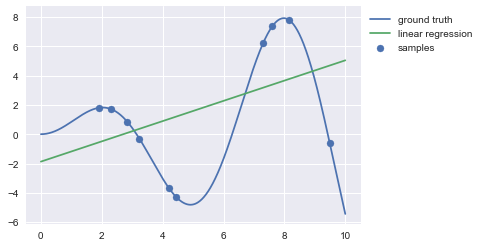

In [78]:
X = np.array([x_sample]).T
model = LinearRegression().fit(X, y_sample)
f = plt.plot(domain, func(domain), label="ground truth")
f = plt.scatter(x_sample, func(x_sample), label="samples")
f = plt.plot([0, 10], [model.intercept_, model.intercept_ + 10 * model.coef_[0]], label="linear regression")
f = plt.legend(loc="upper left", bbox_to_anchor=(1,1))

## Overfitting


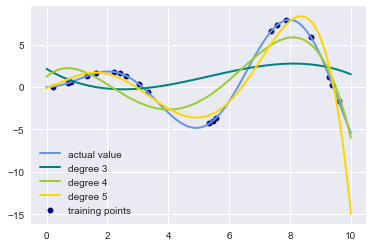

In [79]:

def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="actual value")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()

## Regularization

- Regularization is a method for "constraining" or "regularizing" the **size of the coefficients**, thus "shrinking" them towards zero.
- It reduces model variance which **minimizes overfitting**.

For a regularized linear regression model, we **minimize the sum of RSS and a "penalty term"** that penalizes coefficient size.

**Ridge regression** (or "L2 regularization") minimizes: $$\text{RSS} + \alpha \sum_{j=1}^p \beta_j^2$$

**Lasso regression** (or "L1 regularization") minimizes: $$\text{RSS} + \alpha \sum_{j=1}^p |\beta_j|$$

- $p$ is the **number of features**
- $\beta_j$ is a **model coefficient**
- $\alpha$ is a **tuning parameter:**
    - A tiny $\alpha$ imposes no penalty on the coefficient size, and is equivalent to a normal linear regression model.
    - Increasing the $\alpha$ penalizes the coefficients and thus shrinks them.
    

## Stepwise regression

Stepwise regression means to iteratively select the best predictor (that improves the model the most), then the next best until we have no predictors that improves the model or use all of the predictors. This is also called forward stepwise selection.

A variant called *backward elimination*, involves starting with all candidate predictors, testing the deletion of each variable using a chosen model comparison criterion, deleting the variable (if any) that improves the model the most by being deleted, and repeating this process until no further improvement is possible.

Bidirectional elimination, a combination of the above, testing at each step for variables to be included or excluded.

## Jarque–Bera test

The *Jarque–Bera test* is a *goodness-of-fit* test of whether sample data have the *skewness* and *kurtosis* matching a *normal distribution*. The test is named after *Carlos Jarque* and *Anil K. Bera*. The *test statistic* *JB* is defined as

 $$
    \mathit{JB} = \frac{n-k+1}{6} \left( S^2 + \frac14 (C-3)^2 \right)
  $$

where *n* is the number of observations (or degrees of freedom in general); *S* is the sample *skewness*, *C* is the sample *kurtosis*, and k is the number of regressors:

 $$
     S = \frac{ \hat{\mu}_3 }{ \hat{\sigma}^3 }
        = \frac{\frac1n \sum_{i=1}^n (x_i-\bar{x})^3} {\left(\frac1n \sum_{i=1}^n (x_i-\bar{x})^2 \right)^{3/2}} ,
$$
 $$
 C = \frac{ \hat{\mu}_4 }{ \hat{\sigma}^4 }
    = \frac{\frac1n \sum_{i=1}^n (x_i-\bar{x})^4} {\left(\frac1n \sum_{i=1}^n (x_i-\bar{x})^2 \right)^{2}} ,
$$

where $\hat{\mu}_3$ and $\hat{\mu}_4$ are the estimates of third and fourth *central moment*s, respectively, $\bar{x}$ is the sample *mean*, and $\hat{\sigma}^2$ is the estimate of the second central moment, the *variance*.

If the data comes from a normal distribution, the *JB* statistic *asymptotically* has a *chi-squared distribution* with two *degrees of freedom*, so the statistic can be used to test the hypothesis that the data are from a *normal distribution*. The *null hypothesis* is a joint hypothesis of the skewness being zero and the *excess kurtosis* being zero. Samples from a normal distribution have an expected skewness of 0 and an expected excess kurtosis of 0 (which is the same as a kurtosis of 3). As the definition of *JB* shows, any deviation from this increases the JB statistic.

For small samples the chi-squared approximation is overly sensitive, often rejecting the null hypothesis when it is true. Furthermore, the distribution of **p*-values* departs from a uniform distribution and becomes a right-skewed uni-modal distribution, especially for small *p*-values. This leads to a large *Type I error* rate. The table below shows some *p*-values approximated by a chi-squared distribution that differ from their true alpha levels for small samples.

_Calculated *p*-values equivalents to true alpha levels at given sample sizes_   

| True α level | 20     | 30     | 50     | 50     | 100    |
|--------------|--------|--------|--------|--------|--------|
| 0.1          | 0.307  | 0.252  | 0.201  | 0.183  | 0.1560 |
| 0.05         | 0.1461 | 0.109  | 0.079  | 0.067  | 0.062  |
| 0.025        | 0.051  | 0.0303 | 0.020  | 0.016  | 0.0168 |
| 0.01         | 0.0064 | 0.0033 | 0.0015 | 0.0012 | 0.0002 |



## Durbin–Watson statistic

The Durbin–Watson statistic is a test statistic used to detect the presence of autocorrelation (a relationship between values separated from each other by a given time lag) in the residuals (prediction errors) from a regression analysis. 

### Computing and interpreting the Durbin–Watson statistic  

If $e_{t}$ is the *errors and residuals* associated with the observation at time $t$, then the *test statistic* is

$$d = {\sum_{t=2}^T (e_t - e_{t-1})^2 \over {\sum_{t=1}^T e_t^2}},$$

where $T$ is the number of observations. Note that if one has a lengthy sample, then this can be linearly mapped to the Pearson correlation of the time-series data with its lags. Since $d$ is approximately equal to 2(1&nbsp;−&nbsp;$r$), where $r$ is the sample autocorrelation of the residuals, $d$&nbsp;=&nbsp;2 indicates no autocorrelation. The value of $d$ always lies between 0 and 4. If the Durbin–Watson statistic is substantially less than 2, there is evidence of positive serial correlation. As a rough rule of thumb, if Durbin–Watson is less than 1.0, there may be cause for alarm. Small values of $d$ indicate successive error terms are, on average, close in value to one another, or positively correlated. If $d$&nbsp;>&nbsp;2, successive error terms are, on average, much different in value from one another, i.e., negatively correlated. In regressions, this can imply an underestimation of the level of *statistical significance*.

To test for *positive autocorrelation* at significance $α$, the test statistic $d$ is compared to lower and upper critical values ($d_{L,α}$ and $d_{U,α}$):   

 * If $d$ < $d_{L,α}$, there is statistical evidence that the error terms are positively autocorrelated.    
 *  If $d$ > $d_{U,α}$, there is $'no$' statistical evidence that the error terms are positively autocorrelated.    
 *  If $d_{L,α}$ < $d$ < $d_{U,α}$, the test is inconclusive.    

Positive serial correlation is serial correlation in which a positive error for one observation increases the chances of a positive error for another observation.

To test for *negative autocorrelation* at significance $α$, the test statistic (4&nbsp;−&nbsp;$d$) is compared to lower and upper critical values ($d_{L,α}$ and $d_{U,α}$):

 * If (4 − $d$) < $d_{L,α}$, there is statistical evidence that the error terms are negatively autocorrelated.  
 * If (4&nbsp;−&nbsp;$d$) > $d_{U,α}$, there is $'no$' statistical evidence that the error terms are negatively autocorrelated.  
 * If $d_{L,α}$ < (4 − $d$) < $d_{U,α}$, the test is inconclusive.  

Negative serial correlation implies that a positive error for one observation increases the chance of a negative error for another observation and a negative error for one observation increases the chances of a positive error for another.

The critical values, $d_{L,α}$ and $d_{U,α}$, vary by level of significance ($α$), the number of observations, and the number of predictors in the regression equation. Their derivation is complex—statisticians typically obtain them from the appendices of statistical texts.


## Omnibus tests

Omnibus tests are a kind of statistical test. They test whether the explained variance in a set of data is significantly greater than the unexplained variance, overall. 

In Multiple Regression the omnibus test is an ANOVA F test on all the coefficients, that is equivalent to the multiple correlations R Square F test.

The omnibus F test is an overall test that examines model fit, thus rejecting the null hypothesis implies that the suggested linear model is not significally suitable to the data.
In other words, none of the independent variables has explored as significant in explaining the dependant variable variation.
These hypotheses examine model fit of the most common model: 

$$
y_{i}=β_{0} + β_{1} x_{i1} + ... +β_{k} x_{ik} + ε_{ij}
$$

estimated by $E(y_{i}|x_{i1}....x_{ik})=β_{0}+β_{1}x_{i1}+...+β_{k}x_{ik}
,where E(y_{i}|x_{i1}....x_{ik})$ is the dependant variable explanatory for the $i-th$ observation, $x_{ij}$ is the $j-th$ independent (explanatory) variable, $β_{j}$ is the $j-th$ coefficient of $x_{ij}$ and indicates its influence on the dependant variable y upon its partial correlation with y.

The F statistics of the omnibus test is: 

$$ F = \frac{{\displaystyle \sum_{i=1}^n \left(\widehat {y_i}-\bar {y}\right)^2}/{k}} {{\displaystyle {\sum_{j=1}^{k}} {\sum_{i=1}^{n_j}} \left(y_{ij}-\widehat {y_i}\right)^2}/{(n-k-1)}}$$
 
Whereas, $ȳ$ is the overall sample mean for$ y_{i}, ŷ_{i}$ is the regression estimated mean for specific set of k independent (explanatory) variables and n is the sample size.

The F statistic is distributed $F_{ (k,n-k-1),(α)}$ under assuming of null hypothesis and normality assumption.

#### Model Assumptions in Multiple Linear Regression    

* Random sampling.   
* Normal or approximately normal distribution of the errors $e_{ij}$.   
* The errors  $e_{ij}$ explanatory equals zero, $E(e_{ij})=0$.    
* Equal variances of the errors $e_{ij}$. Which it's omnibus F test ( like Levene F test).   
* No Multi-collinearity between explanatory/predictor variables' meaning: $cov(x_{i},x_{j})=0$ where is $i≠j$, for any $i$ or $j$.    

#### The omnibus F test regarding the hypotheses over the coefficients   
$$
H_{0}: β_{1}= β_{2}=….= β_{k} = 0
$$
$$
H_{1}: \quad at \quad least \quad one \quad pair \quad  β_{j}≠ β_{j'}
$$
The omnibus test examines whether there are any regression coefficients that are significantly non-zero, except for the coefficient $β0$. The $β0$ coefficient goes with the constant predictor and is usually not of interest. 



## Degrees of freedom

The degrees of freedom is the number of values in the final calculation of a statistic that are free to vary.

The number of independent ways by which a dynamic system can move, without violating any constraint imposed on it, is called number of degrees of freedom. In other words, the number of degrees of freedom can be defined as the minimum number of independent coordinates that can specify the position of the system completely.

The degrees of freedom equals the number of observations minus the number of parameters estimated. In regression, a parameter is estimated for every term in the model, and and each one consumes a degree of freedom. Therefore, the greater the number of terms in a multiple regression model reduces the degrees of freedom available to estimate the parameters variance. 


## Likelihood and Negative Log Likelihood

The Log Likelihood asks the question if the data were generated by the model, what parameters were most likely to have been used?  In linear regression problems we need to make the assumption that the feature vectors are all independent and identically distributed (IID). 

## AIC, BIC, Mallows's Cp

Beside's $R^2$ there are many tests used to assess the fit of a regression model that has been estimated using ordinary least squares.  $R^2$ always get smaller as more variables are added to a model, which is a form of overfitting.  Some analysts used other statistical tests to assess the fit of a regression model. The most common being the *Akaike information criterion (AIC)*, the *Bayesian information criterion (BIC)*, and 


_Akaike information criterion_

The Akaike information criterion (AIC) is a measure of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Hence, AIC provides a means for model selection.  

AIC is founded on information theory: it offers a relative estimate of the information lost when a given model is used to represent the process that generates the data. In doing so, it deals with the trade-off between the goodness of fit of the model and the complexity of the model.

- from [Akaike information criterion - Wikipedia](https://en.wikipedia.org/wiki/Akaike_information_criterion)


_Bayesian information criterion (BIC)_

In statistics, the Bayesian information criterion (BIC) or Schwarz criterion (also SBC, SBIC) is a criterion for model selection among a finite set of models; the model with the lowest BIC is preferred. It is based, in part, on the likelihood function and it is closely related to the Akaike information criterion (AIC).  

When fitting models, it is possible to increase the likelihood by adding parameters, but doing so may result in overfitting. Both BIC and AIC resolve this problem by introducing a penalty term for the number of parameters in the model; the penalty term is larger in BIC than in AIC. The BIC was developed by Gideon E. Schwarz and published in a 1978 paper, where he gave a Bayesian argument for adopting it.  

- from [Bayesian information criterion (BIC) - Wikipedia](https://en.wikipedia.org/wiki/Bayesian_information_criterion) 


_Mallows's Cp_

In statistics, Mallows's Cp, named for Colin Lingwood Mallows, is used to assess the fit of a regression model that has been estimated using ordinary least squares. It is applied in the context of model selection, where a number of predictor variables are available for predicting some outcome, and the goal is to find the best model involving a subset of these predictors.

- from [Mallows's Cp- Wikipedia](https://en.wikipedia.org/wiki/Mallows%27s_Cp) 


We won't discuss which to use (although R makes it easy to use them all!). Rather just point out that they are all used to assess the fit of a regression model that has been estimated using ordinary least squares. Also note that high (i.e close to 1) is "good" for $R^2$ and low (i.e close to 0) is "good" for AIC, BIC, Mallows's Cp. 


Test          | "Good"
------------- | -------------
$R^2$         | High
AIC           | Low
BIC           | Low
Mallows's Cp  | Low



## Dummy variables 
    
[Dummy variables](https://en.wikipedia.org/wiki/Dummy_variable_(statistics) (also known as an indicator variable, design variable, Boolean indicator, categorical variable, binary variable, or qualitative variable) is one that takes the value 0 or 1 to indicate the absence or presence of some categorical effect that may be expected to shift the outcome. 

Dummy variables are "proxy" variables or numeric stand-ins for qualitative facts in a regression model. In regression analysis, the dependent variables may be influenced not only by quantitative variables (income, output, prices, etc.), but also by qualitative variables (gender, religion, geographic region, etc.). A dummy independent variable (also called a dummy explanatory variable) which for some observation has a value of 0 will cause that variable's coefficient to have no role in influencing the dependent variable, while when the dummy takes on a value 1 its coefficient acts to alter the intercept.

In [80]:
titanic = pd.read_csv('http://bit.ly/kaggletrain')

In [81]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
pd.get_dummies(titanic.Sex).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [83]:
# drop the first dummy variable using  'iloc'
pd.get_dummies(titanic.Sex).iloc[:, 1:].head()

,male
0,1
1,0
2,0
3,0
4,1


In [84]:
# add a prefix
pd.get_dummies(titanic.Sex, prefix='Sex').iloc[:, 1:].head(9)

,Sex_male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0


In [85]:
# Embarked is a feature that has 3 possible values
pd.get_dummies(titanic.Embarked, prefix='Embarked').head(9)

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1


In [86]:
# add dummy variables to df
dummies = pd.get_dummies(titanic.Embarked, prefix='Embarked').iloc[:, 1:]
titanic = pd.concat([titanic, dummies], axis=1)
titanic.head(9)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,1


## Interaction Terms

”:” adds a new column to the design matrix with the product of the other two columns. 

“*” will also include the individual columns that were multiplied together:

An *interaction variable* is a variable constructed from an original set of variables to try to represent either all of the interaction present or some part of it. An *interaction variable* models the simultaneous influence of two predictors on a third response variable is not additive. We want to know whether the joint effect is higher than the sum of both effects. An an interaction may arise when considering the relationship among three or more variables, and describes a situation in which the simultaneous influence of two variables on a third is not additive.

For example, smoking and inhaling asbestos fibers both increase the risk of lung cancer, but exposure to asbestos and smoking multiplies the cancer risk. ere, the joint effect of inhaling asbestos and smoking is higher than the sum of both effects. from [*Relation between exposure to asbestos and smoking jointly and the risk of lung cancer*](http://oem.bmj.com/content/58/3/145)  

Simple linear models assume that if a predictor variable affects the outcome variable, it does so in a way that is independent of all the other predictor variables.  

We deal with non-independence of predictors by including interaction terms in our models. Interaction variables introduce an additional level of regression analysis by allowing researchers to explore the synergistic effects of combined predictors.   

Interaction variables can be:
* interaction between two categorical variables,
* interaction between one continuous and one categorical variables,
* and the interaction between two continuous variables.  
